<a href="https://colab.research.google.com/github/laresamdeola/Machine-Learning/blob/main/Building_a_Model_to_Predict_Real_Estate_Price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("Real estate.csv")

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   No                                      414 non-null    int64  
 1   X1 transaction date                     414 non-null    float64
 2   X2 house age                            414 non-null    float64
 3   X3 distance to the nearest MRT station  414 non-null    float64
 4   X4 number of convenience stores         414 non-null    int64  
 5   X5 latitude                             414 non-null    float64
 6   X6 longitude                            414 non-null    float64
 7   Y house price of unit area              414 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 26.0 KB


In [4]:
data.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [5]:
data.tail()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
409,410,2013.000,13.7,4082.01500,0,24.94155,121.50381,15.4
410,411,2012.667,5.6,90.45606,9,24.97433,121.54310,50.0
411,412,2013.250,18.8,390.96960,7,24.97923,121.53986,40.6
412,413,2013.000,8.1,104.81010,5,24.96674,121.54067,52.5
413,414,2013.500,6.5,90.45606,9,24.97433,121.54310,63.9


In [6]:
data.corr()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
No,1.000000,-0.048658,-0.032808,-0.013573,-0.012699,-0.010110,-0.011059,-0.028587
X1 transaction date,-0.048658,1.000000,0.017549,0.060880,0.009635,0.035058,-0.041082,0.087491
X2 house age,-0.032808,0.017549,1.000000,0.025622,0.049593,0.054420,-0.048520,-0.210567
X3 distance to the nearest MRT station,-0.013573,0.060880,0.025622,1.000000,-0.602519,-0.591067,-0.806317,-0.673613
X4 number of convenience stores,-0.012699,0.009635,0.049593,-0.602519,1.000000,0.444143,0.449099,0.571005
X5 latitude,-0.010110,0.035058,0.054420,-0.591067,0.444143,1.000000,0.412924,0.546307
X6 longitude,-0.011059,-0.041082,-0.048520,-0.806317,0.449099,0.412924,1.000000,0.523287
Y house price of unit area,-0.028587,0.087491,-0.210567,-0.673613,0.571005,0.546307,0.523287,1.000000


In [7]:
X = data.iloc[:, 2:-1].values
y = data.iloc[:, -1].values

In [8]:
print(X)

[[ 32.       84.87882  10.       24.98298 121.54024]
 [ 19.5     306.5947    9.       24.98034 121.53951]
 [ 13.3     561.9845    5.       24.98746 121.54391]
 ...
 [ 18.8     390.9696    7.       24.97923 121.53986]
 [  8.1     104.8101    5.       24.96674 121.54067]
 [  6.5      90.45606   9.       24.97433 121.5431 ]]


In [9]:
print(y)

[ 37.9  42.2  47.3  54.8  43.1  32.1  40.3  46.7  18.8  22.1  41.4  58.1
  39.3  23.8  34.3  50.5  70.1  37.4  42.3  47.7  29.3  51.6  24.6  47.9
  38.8  27.   56.2  33.6  47.   57.1  22.1  25.   34.2  49.3  55.1  27.3
  22.9  25.3  47.7  46.2  15.9  18.2  34.7  34.1  53.9  38.3  42.   61.5
  13.4  13.2  44.2  20.7  27.   38.9  51.7  13.7  41.9  53.5  22.6  42.4
  21.3  63.2  27.7  55.   25.3  44.3  50.7  56.8  36.2  42.   59.   40.8
  36.3  20.   54.4  29.5  36.8  25.6  29.8  26.5  40.3  36.8  48.1  17.7
  43.7  50.8  27.   18.3  48.   25.3  45.4  43.2  21.8  16.1  41.   51.8
  59.5  34.6  51.   62.2  38.2  32.9  54.4  45.7  30.5  71.   47.1  26.6
  34.1  28.4  51.6  39.4  23.1   7.6  53.3  46.4  12.2  13.   30.6  59.6
  31.3  48.   32.5  45.5  57.4  48.6  62.9  55.   60.7  41.   37.5  30.7
  37.5  39.5  42.2  20.8  46.8  47.4  43.5  42.5  51.4  28.9  37.5  40.1
  28.4  45.5  52.2  43.2  45.1  39.7  48.5  44.7  28.9  40.9  20.7  15.6
  18.3  35.6  39.4  37.4  57.8  39.6  11.6  55.5  5

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

In [24]:
print(X_train[:, 0])

[18.2 13.6  3.8  4.  41.3  3.4 35.4  6.2 33.2 10.8 20.9 13.2 14.1 13.2
 10.4 23.  28.6 13.8 12.8 13.2 35.3 27.5 17.7 16.4 12.5 37.3  9.1  3.6
 17.2  3.7  1.1 13.3 13.3 13.   3.5  6.5 33.5 25.6 30.  31.7  4.1  3.8
  8.9  4.   9.9  0.  13.2  4.3  0.  10.  33.3 31.3  9.9 17.9 17.   0.
 34.4 32.   0.  16.1 32.4  4.1  6.6  3.1 35.8 34.5  8.5 28.2 16.4 11.5
  6.2  2.1 13.1 36.1  3.5  4.1 31.   3.6 30.6  1.9 19.2 33.5 12.5 10.3
  3.2 26.8 17.5 15.4 34.8  8.1 30.2 13.3 18.9 16.2 16.9  1.5 19.8 11.6
 15.   2.7 12.2 18.8 12.4 31.4  1.1  8.4 18.  42.7 32.6 15.1 31.7  1.1
  6.4 41.4  5.7  7.8 19.2 29.6 14.4 31.7 16.4 37.9 30.1 24.2 34.6 34.7
 12.6 16.5  9.  21.2 13.9 15.6  2.6 16.1 41.3 21.7 39.2  1.  37.7  7.8
 18.   8.  18.5 16.4 17.1 36.6 22.2 27.6  3.9 35.9 14.8 33.  29.3 29.1
 10.5 19.  18.2 13.6 39.6 14.1 12.8 33.4 30.9 17.6 21.7 10.3  1.5 16.2
 28.  33.6 15.9 16.2 38.3 11.6 28.4 30.6  0.  25.3  0.  24.   5.6 16.1
 13.9 15.2 34.  13.5 33.6  0.  37.2 29.6 30.3 11.  40.9  9.7 16.2 16.4
 38.3 1

In [11]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [12]:
y_pred = regressor.predict(X_test)

In [16]:
print(f"Price = {round(regressor.intercept_, 2)} + {round(regressor.coef_[0], 2)}house age + {round(regressor.coef_[1], 4)}mri station + {round(regressor.coef_[2], 2)}convenience store + {round(regressor.coef_[3], 2)}latitude + {round(regressor.coef_[4], 2)}longitude" )

Price = -433.79 + -0.24house age + -0.0047mri station + 1.09convenience store + 224.0latitude + -42.1longitude


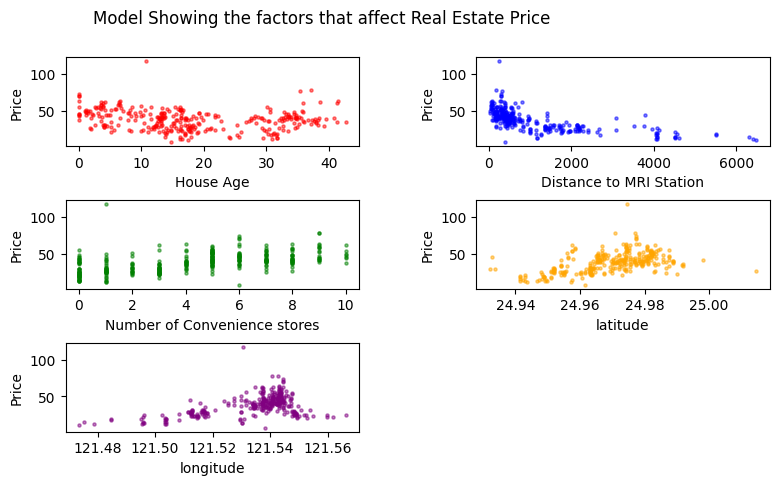

In [61]:
plt.suptitle("Model Showing the factors that affect Real Estate Price")

plt.subplot(3,2,1)
plt.scatter(X_train[:, 0], y_train, color="r", s=5, alpha=0.5)
plt.xlabel("House Age")
plt.ylabel("Price")

plt.subplot(3,2,2)
plt.scatter(X_train[:, 1], y_train, color="b", s=5, alpha=0.5)
plt.xlabel("Distance to MRI Station")
plt.ylabel("Price")

plt.subplot(3,2,3)
plt.scatter(X_train[:, 2], y_train, color="g", s=5, alpha=0.5)
plt.xlabel("Number of Convenience stores")
plt.ylabel("Price")

plt.subplot(3,2,4)
plt.scatter(X_train[:, 3], y_train, color="orange", s=5, alpha=0.5)
plt.xlabel("latitude")
plt.ylabel("Price")

plt.subplot(3,2,5)
plt.scatter(X_train[:, 4], y_train, color="purple", s=5, alpha=0.5)
plt.xlabel("longitude")
plt.ylabel("Price")

plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=1.2,
                    wspace=0.4,
                    hspace=0.6)

plt.show()